# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [15]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [17]:
# Define utility functions
def u_A(x_A1, x_A2, alpha):
    return x_A1 **alpha * x_A2 ** (1-alpha)

def u_B(x_B1, x_B2, beta):
    return x_B1 ** beta * x_B2 ** (1-beta)

In [18]:
# Define endowment points
omega_A1 = 0.8
omega_A2 = 0.3
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2

In [19]:
# Define alpha and beta
alpha = 1/3
beta = 2/3

In [20]:
# Define the grid for p1 and p2
N = 75
x_A1_values = [i/N for i in range(N+1)]
x_A2_values = [i/N for i in range(N+1)]

In [21]:
# Initialize list to store Pareto improvements
pareto_improvements = []

# Iterate over combinations
for x_A1 in x_A1_values:
    for x_A2 in x_A2_values:
        x_B1 = 1 - x_A1
        x_B2 = 1 - x_A2
        
        # Check if the combination is a Pareto improvement
        if (u_A(x_A1, x_A2, alpha) > u_A(omega_A1, omega_A2, alpha) and
            u_B(x_B1, x_B2, beta) > u_B(omega_B1, omega_B2, beta)):
            pareto_improvements.append((x_A1, x_A2))

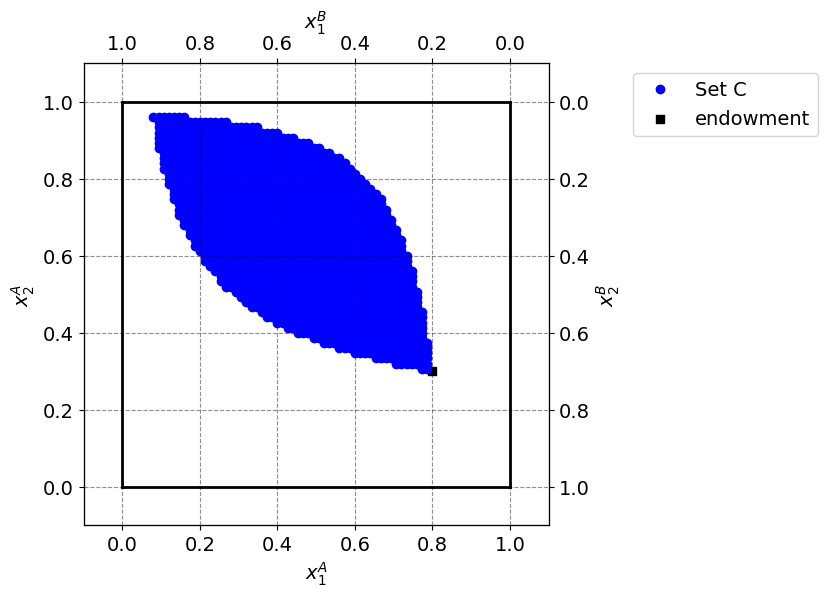

In [22]:

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


from Exchange import ExchangeEconomyClass


model = ExchangeEconomyClass()


par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Extract x_A1 and x_A2 from pareto_improvements
pareto_improvements_x_A1 = [allocation[0] for allocation in pareto_improvements]
pareto_improvements_x_A2 = [allocation[1] for allocation in pareto_improvements]

# Plot the set C
ax_A.plot(pareto_improvements_x_A1, pareto_improvements_x_A2, 'bo', label='Set C')

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));


# Question 2

Explain your code and procedure

In [23]:
# Define the grid for p1 and p2
N = 75
P1 = [0.5+2*i/N for i in range(N+1)]
p2 = 1  # Numeraire is p2 = 1

In [24]:
# Define alpha and beta
alpha = 1/3
beta = 2/3

# Initialize lists to store errors
errors_1 = []
errors_2 = []
# Iterate over each value of p1
for p1 in P1:
    # Calculate demand for both goods for consumer A
    x_A1_star = alpha * (p1 * omega_A1 + omega_A2 * p2) / p1
    x_A2_star = (1 - alpha) * (p1 * omega_A1 + omega_A2 * p2) / p2
    
    # Calculate demand for both goods for consumer B
    x_B1_star = beta * (p1 * omega_B1 + omega_B2* p2) / p1
    x_B2_star = (1 - beta) * (p1 * omega_B1 + omega_B2 * p2) / p2

# Calculate errors in market clearing conditions
    error_1 = x_A1_star - omega_A1 + x_B1_star - omega_B1
    error_2 = x_A2_star - omega_A2 + x_B2_star - omega_B2
    
    # Append errors to the lists
    errors_1.append(error_1)
    errors_2.append(error_2)

# Print errors
print("Errors in market clearing conditions:")
for i, p1 in enumerate(P1):
    print(f"For p1 = {p1}:")
    print(f"Error 1: {errors_1[i]}")
    print(f"Error 2: {errors_2[i]}")
    print()


Errors in market clearing conditions:
For p1 = 0.5:
Error 1: 0.533333333333333
Error 2: -0.2666666666666666

For p1 = 0.5266666666666666:
Error 1: 0.47594936708860747
Error 2: -0.25066666666666654

For p1 = 0.5533333333333333:
Error 1: 0.42409638554216855
Error 2: -0.23466666666666652

For p1 = 0.58:
Error 1: 0.3770114942528735
Error 2: -0.2186666666666665

For p1 = 0.6066666666666667:
Error 1: 0.33406593406593377
Error 2: -0.2026666666666665

For p1 = 0.6333333333333333:
Error 1: 0.2947368421052629
Error 2: -0.18666666666666654

For p1 = 0.66:
Error 1: 0.2585858585858586
Error 2: -0.1706666666666664

For p1 = 0.6866666666666666:
Error 1: 0.22524271844660193
Error 2: -0.1546666666666665

For p1 = 0.7133333333333334:
Error 1: 0.19439252336448576
Error 2: -0.1386666666666665

For p1 = 0.74:
Error 1: 0.16576576576576557
Error 2: -0.12266666666666659

For p1 = 0.7666666666666666:
Error 1: 0.13913043478260856
Error 2: -0.10666666666666658

For p1 = 0.7933333333333333:
Error 1: 0.11428571428

# Question 3

Explain your code and procedure

In [25]:
# Define demand functions for both consumers
def demand_A(p1):
    x_A1 = alpha * (p1 * omega_A1 + omega_A2) / p1
    return x_A1

def demand_B(p1):
    x_B1 = beta * (p1 * omega_B1 + omega_B2) / p1
    return x_B1

# Define supply functions
def supply_A(p1):
    return omega_A1

def supply_B(p1):
    return omega_B1

# Define a function to calculate the market clearing price
def market_clearing_price():
    # Define a range of prices
    prices = np.linspace(0.5, 2.5, num=1000)
    
    # Iterate over prices to find the one where quantity demanded equals quantity supplied
    for p1 in prices:
        if demand_A(p1) + demand_B(p1) == supply_A(p1) + supply_B(p1):
            return p1
    
    return None  # Return None if no market clearing price is found

# Find the market clearing price
clearing_price = market_clearing_price()

# Print the result
if clearing_price is not None:
    print("The market clearing price is:", clearing_price)
else:
    print("No market clearing price found in the given range of prices.")



The market clearing price is: 0.9444444444444444


# Question 4a

In [26]:
# Define the utility function
def u_A(x_A1, x_A2):
    return x_A1 ** alpha * x_A2 ** (1 - alpha)

# Initialize variables to store the optimal allocation and utility
optimal_x_A1 = 0
optimal_x_A2 = 0
max_utility = float('-inf')
optimal_p1 = None

# Loop through all possible allocations of x_A1 and x_A2
for p1 in P1:
    x_A1 = alpha * (p1 * omega_A1 + omega_A2) / p1
    x_A2 = (1 - alpha) * (p1 * omega_A1 +  omega_A2)
    
    # Ensure that x_A1 and x_A2 are between 0 and 1
    if 0 <= x_A1 <= 1 and 0 <= x_A2 <= 1:
        current_utility = u_A(x_A1, x_A2)
        # Check if current allocation gives higher utility
        if current_utility > max_utility:
            max_utility = current_utility
            optimal_x_A1 = x_A1
            optimal_x_A2 = x_A2
            optimal_p1 = p1

# Print the results
print("Optimal allocation of x_A1:", optimal_x_A1)
print("Optimal allocation of x_A2:", optimal_x_A2)
print("Optimal p1:", optimal_p1)


Optimal allocation of x_A1: 0.3339312406576981
Optimal allocation of x_A2: 0.9928888888888892
Optimal p1: 1.4866666666666668


# Question 4b

In [27]:
from scipy.optimize import minimize


# Define the utility function to be minimized (negative of the given utility function)
def neg_utility(vars):
    p1 = vars[0]
    x_A1 = alpha * (p1 * omega_A1 + omega_A2) / p1
    x_A2 = (1 - alpha) * (p1 * omega_A1 + omega_A2)
    return -(x_A1 ** alpha * x_A2 ** (1 - alpha))

# Define the constraint for p1 to be positive
def constraint(vars):
    p1 = vars[0]
    return p1

# Define the constraints for x_A1 and x_A2 to be within [0, 1]
def x_A1_constraint(vars):
    p1 = vars[0]
    x_A1 = alpha * (p1 * omega_A1 + omega_A2) / p1
    return x_A1 - 1  # Ensures x_A1 <= 1

def x_A2_constraint(vars):
    p1 = vars[0]
    x_A2 = (1 - alpha) * (p1 * omega_A1 + omega_A2)
    return x_A2 - 1  # Ensures x_A2 <= 1

def x_A2_upper_constraint(vars):
    p1 = vars[0]
    x_A2 = (1 - alpha) * (p1 * omega_A1 + omega_A2)
    return x_A2 - 1  # Ensures x_A2 <= 1

# Initial guess for p1
x0 = [1.5]

# Define bounds for p1
bounds = [(0, None)]

# Define constraints
constraints = [{'type': 'ineq', 'fun': constraint},
               {'type': 'ineq', 'fun': x_A1_constraint},
               {'type': 'ineq', 'fun': x_A2_constraint},
               {'type': 'ineq', 'fun': x_A2_upper_constraint}]

# Minimize the negative of the utility function
result = minimize(neg_utility, x0, bounds=bounds, constraints=constraints)

# Extract optimal p1
optimal_p1 = result.x[0]

# Calculate corresponding x_A1 and x_A2
optimal_x_A1 = alpha * (optimal_p1 * omega_A1 + omega_A2) / optimal_p1
optimal_x_A2 = (1 - alpha) * (optimal_p1 * omega_A1 + omega_A2)

print("Optimal p1:", optimal_p1)
print("Corresponding x_A1:", optimal_x_A1)
print("Corresponding x_A2:", optimal_x_A2)

Optimal p1: 1.500000000000004
Corresponding x_A1: 0.3333333333333332
Corresponding x_A2: 1.0000000000000024


# Question 5a

In [28]:
# Initialize variables to store the optimal allocation and utility
optimal_allocation = None
max_utility_A = float('-inf')

# Iterate over combinations
for x_A1 in x_A1_values:
    for x_A2 in x_A2_values:
        # Calculate x_B1 and x_B2
        x_B1 = 1 - x_A1
        x_B2 = 1 - x_A2
        
        # Check if the allocation satisfies the constraints
        if 0 <= x_A1 <= 1 and 0 <= x_A2 <= 1 and 0 <= x_B1 <= 1 and 0 <= x_B2 <= 1:
            # Calculate utilities for A and B
            utility_A = u_A(x_A1, x_A2, alpha)
            utility_B = u_B(x_B1, x_B2, beta)
            
            # Check if B's utility is not worse than endowment
            if utility_B >= u_B(omega_B1, omega_B2, beta):
                # Check if this allocation maximizes A's utility
                if utility_A > max_utility_A:
                    max_utility_A = utility_A
                    optimal_allocation = (x_A1, x_A2, x_B1, x_B2)

# Print the optimal allocation and utilities
if optimal_allocation is not None:
    print("Optimal allocation:")
    print("x_A1 =", optimal_allocation[0])
    print("x_A2 =", optimal_allocation[1])
    print("x_B1 =", optimal_allocation[2])
    print("x_B2 =", optimal_allocation[3])
    print("Utility for A:", max_utility_A)
    print("Utility for B:", u_B(optimal_allocation[2], optimal_allocation[3], beta))
else:
    print("No feasible allocation found.")


TypeError: u_A() takes 2 positional arguments but 3 were given

# Question 5b

In [ ]:
# Initialize variables to store the optimal allocation and utility
optimal_allocation = None
max_utility_A = float('-inf')

# Iterate over combinations
for x_A1 in np.linspace(0, 1, num=1000):
    for x_A2 in np.linspace(0, 1, num=1000):
        # Calculate x_B1 and x_B2
        x_B1 = 1 - x_A1
        x_B2 = 1 - x_A2
        
        # Calculate utilities for A and B
        utility_A = u_A(x_A1, x_A2, alpha)
        utility_B = u_B(x_B1, x_B2, beta)
            
        # Check if this allocation maximizes A's utility and utility for B is not worse than the endowment
        if utility_A > max_utility_A and utility_B >= u_B(omega_B1, omega_B2, beta):
            max_utility_A = utility_A
            optimal_allocation = (x_A1, x_A2, x_B1, x_B2)

# Print the optimal allocation and utilities
if optimal_allocation is not None:
    print("Optimal allocation:")
    print("x_A1 =", optimal_allocation[0])
    print("x_A2 =", optimal_allocation[1])
    print("x_B1 =", optimal_allocation[2])
    print("x_B2 =", optimal_allocation[3])
    print("Utility for A:", max_utility_A)
    print("Utility for B:", u_B(optimal_allocation[2], optimal_allocation[3], beta))
else:
    print("No feasible allocation found.")


Optimal allocation:
x_A1 = 0.5695695695695696
x_A2 = 0.8488488488488488
x_B1 = 0.4304304304304304
x_B2 = 0.1511511511511512
Utility for A: 0.743137485688798
Utility for B: 0.30367273291585534


# Question 6a

In [ ]:
# Initialize variables to store the optimal allocation and utility
optimal_allocation = None
max_aggregate_utility = float('-inf')

# Iterate over combinations
for x_A1 in np.linspace(0, 1, num=1000):
    for x_A2 in np.linspace(0, 1, num=1000):
        # Calculate x_B1 and x_B2
        x_B1 = 1 - x_A1
        x_B2 = 1 - x_A2
        
        # Calculate utilities for A and B
        utility_A = u_A(x_A1, x_A2, alpha)
        utility_B = u_B(x_B1, x_B2, beta)
        
        # Calculate aggregate utility
        aggregate_utility = utility_A + utility_B
            
        # Check if this allocation maximizes aggregate utility
        if aggregate_utility > max_aggregate_utility:
            max_aggregate_utility = aggregate_utility
            optimal_allocation = (x_A1, x_A2, x_B1, x_B2)

# Print the optimal allocation and utilities
if optimal_allocation is not None:
    print("Optimal allocation:")
    print("x_A1 =", optimal_allocation[0])
    print("x_A2 =", optimal_allocation[1])
    print("x_B1 =", optimal_allocation[2])
    print("x_B2 =", optimal_allocation[3])
    print("Aggregate utility:", max_aggregate_utility)
    print("Utility for A:", u_A(optimal_allocation[0], optimal_allocation[1], alpha))
    print("Utility for B:", u_B(optimal_allocation[2], optimal_allocation[3], beta))
else:
    print("No feasible allocation found.")


Optimal allocation:
x_A1 = 0.33333333333333337
x_A2 = 0.6666666666666667
x_B1 = 0.6666666666666666
x_B2 = 0.33333333333333326
Aggregate utility: 1.0582673679787997
Utility for A: 0.5291336839893999
Utility for B: 0.5291336839893998


# Question 6b

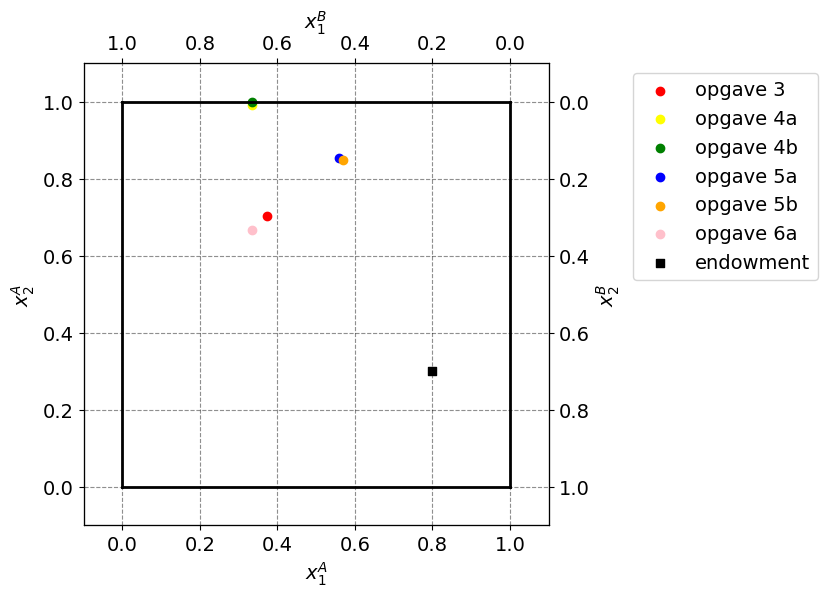

In [ ]:

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


from Exchange import ExchangeEconomyClass


model = ExchangeEconomyClass()


par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()


opgave_3x_A1 = 0.37254902
opgave_3x_A2 = 0.703703704
opgave_4ax_A1 = 0.333931241
opgave_4ax_A2 = 0.992888889
opgave_4bx_A1 = 0.333333333
opgave_4bx_A2 = 1
opgave_5ax_A1 = 0.56
opgave_5ax_A2 = 0.8533333
opgave_5bx_A1 = 0.56956957
opgave_5bx_A2 = 0.848848849
opgave_6ax_A1 = 0.333333333
opgave_6ax_A2 = 0.6666666667

ax_A.scatter(opgave_3x_A1,opgave_3x_A2, marker='o',color='red',label='opgave 3')
ax_A.scatter(opgave_4ax_A1,opgave_4ax_A2, marker='o',color='yellow',label='opgave 4a')
ax_A.scatter(opgave_4bx_A1,opgave_4bx_A2, marker='o',color='green',label='opgave 4b')
ax_A.scatter(opgave_5ax_A1,opgave_5ax_A2, marker='o',color='blue',label='opgave 5a')
ax_A.scatter(opgave_5bx_A1,opgave_5bx_A2, marker='o',color='orange',label='opgave 5b')
ax_A.scatter(opgave_6ax_A1,opgave_6ax_A2, marker='o',color='pink',label='opgave 6a')
# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

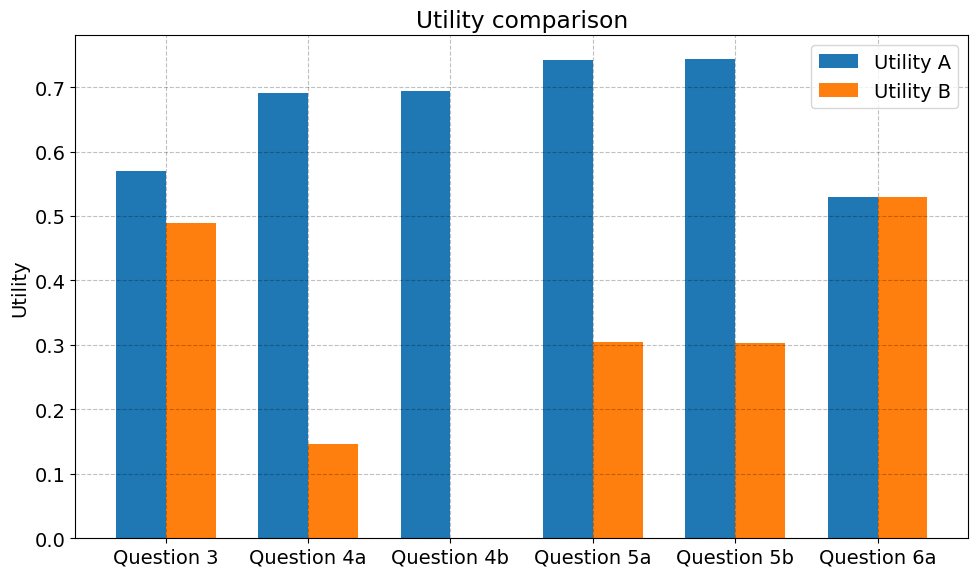

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the allocation results from questions 3)-6)
allocations = {
    'Question 3': {'x_A1': 0.37254902, 'x_A2': 0.703703704, 'x_B1': 0.62745098, 'x_B2': 0.296296296},
    'Question 4a': {'x_A1': 0.333931241, 'x_A2': 0.992888889, 'x_B1': 0.666068759, 'x_B2': 0.007111111},
    'Question 4b': {'x_A1': 0.333333333, 'x_A2': 1, 'x_B1': 0.6666666667, 'x_B2': 0},
    'Question 5a': {'x_A1': 0.56, 'x_A2': 0.8533333, 'x_B1': 0.44, 'x_B2': 0.14666667},
    'Question 5b': {'x_A1': 0.56956957, 'x_A2': 0.848848849, 'x_B1': 0.43043043, 'x_B2': 0.151151151},
    'Question 6a': {'x_A1': 0.333333333, 'x_A2': 0.6666666667, 'x_B1': 0.6666666667, 'x_B2': 0.333333333}
}

# Plot utility values
utility_A = []
utility_B = []
labels = []

for label, allocation in allocations.items():
    x_A1, x_A2, x_B1, x_B2 = allocation.values()
    utility_A.append(x_A1 ** (1/3) * x_A2 ** (2/3))
    utility_B.append(x_B1 ** (2/3) * x_B2 ** (1/3))
    labels.append(label)

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, utility_A, width, label='Utility A')
rects2 = ax.bar(x + width/2, utility_B, width, label='Utility B')

ax.set_ylabel('Utility')
ax.set_title('Utility comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()

plt.show()

# Question 7

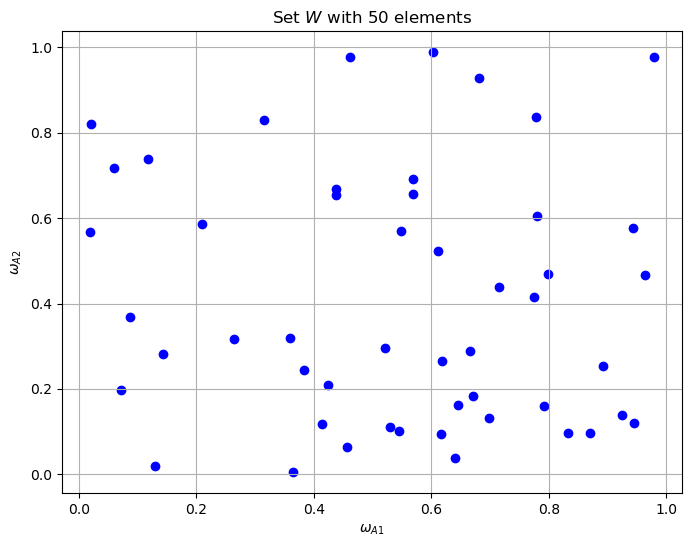

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Number of elements in the set W
num_elements = 50

# Generate random values for omega_A1 and omega_A2
omega_A1_values = np.random.uniform(0, 1, num_elements)
omega_A2_values = np.random.uniform(0, 1, num_elements)

# Plot the set W
plt.figure(figsize=(8, 6))
plt.scatter(omega_A1_values, omega_A2_values, color='blue')
plt.title('Set $W$ with 50 elements')
plt.xlabel('$\omega_{A1}$')
plt.ylabel('$\omega_{A2}$')
plt.grid(True)
plt.show()


# Question 8

Set W (Endowments for Agent A of Good 1 and Good 2, and Endowments for Agent B of Good 1 and Good 2):
[[0.00718014 0.33169902 0.99281986 0.66830098]
 [0.13669292 0.65801807 0.86330708 0.34198193]
 [0.70365862 0.65776768 0.29634138 0.34223232]
 [0.23926871 0.32889232 0.76073129 0.67110768]
 [0.6036947  0.93714126 0.3963053  0.06285874]
 [0.37630804 0.7473925  0.62369196 0.2526075 ]
 [0.4746881  0.00745764 0.5253119  0.99254236]
 [0.10667168 0.39667534 0.89332832 0.60332466]
 [0.61390079 0.97530766 0.38609921 0.02469234]
 [0.37846993 0.13291776 0.62153007 0.86708224]
 [0.32288135 0.51165968 0.67711865 0.48834032]
 [0.48917635 0.18374818 0.51082365 0.81625182]
 [0.74886978 0.93073077 0.25113022 0.06926923]
 [0.91337684 0.56871362 0.08662316 0.43128638]
 [0.90430637 0.49705835 0.09569363 0.50294165]
 [0.14680261 0.02074001 0.85319739 0.97925999]
 [0.91037369 0.18778403 0.08962631 0.81221597]
 [0.78930566 0.64966648 0.21069434 0.35033352]
 [0.53907442 0.94294631 0.46092558 0.05705369]
 [0.0

c:\Anaconda\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Anton\AppData\Local\Temp\ipykernel_2356\3332572569.py:26: RuntimeWarning: invalid value encountered in power
  return x1**alpha_A * x2**(1-alpha_A)
C:\Users\Anton\AppData\Local\Temp\ipykernel_2356\3332572569.py:35: RuntimeWarning: invalid value encountered in power
  return x1**alpha_B * x2**(1-alpha_B)
C:\Users\Anton\AppData\Local\Temp\ipykernel_2356\3332572569.py:26: RuntimeWarning: invalid value encountered in scalar power
  return x1**alpha_A * x2**(1-alpha_A)
C:\Users\Anton\AppData\Local\Temp\ipykernel_2356\3332572569.py:35: RuntimeWarning: invalid value encountered in scalar power
  return x1**alpha_B * x2**(1-alpha_B)
c:\Anaconda\lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measur

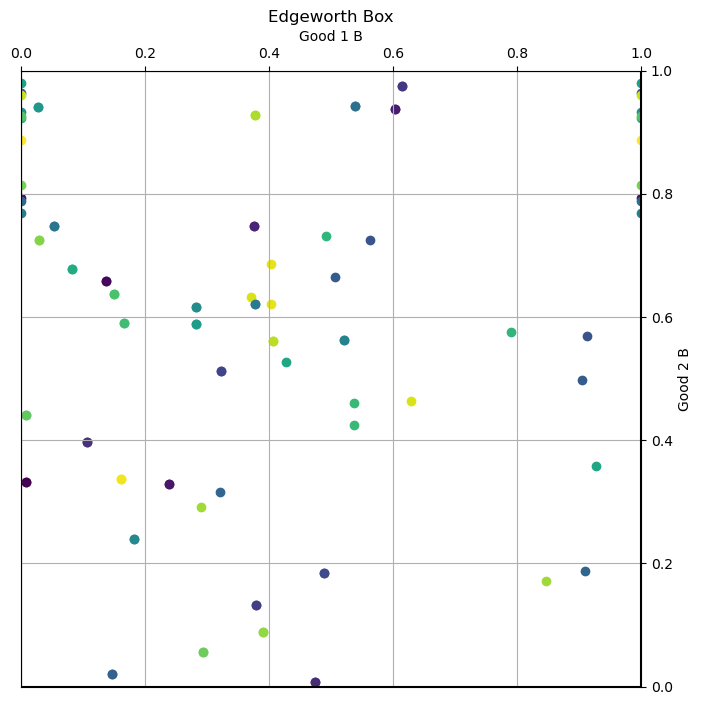

In [1]:
import numpy as np

# Set the number of vectors
num_samples = 50

# Generate random endowment vectors for agent A
endowments_A = np.random.rand(num_samples, 2)

# Calculate endowments for agent B
endowments_B = 1 - endowments_A

# Combine endowments for agent A and agent B into a single set W
endowments_W = np.concatenate((endowments_A, endowments_B), axis=1)

# Print the set W
print("Set W (Endowments for Agent A of Good 1 and Good 2, and Endowments for Agent B of Good 1 and Good 2):")
print(endowments_W)

# Given parameters
alpha_A = 1/3
alpha_B = 2/3
price_good2 = 1  # Price of good 2

# Utility and demand functions for agent A
def utility_A(x1, x2):
    return x1**alpha_A * x2**(1-alpha_A)

def demand_A(p1, p2, omega_A1, omega_A2):
    x1 = alpha_A * omega_A1 / p1
    x2 = (1 - alpha_A) * omega_A2 / p2
    return x1, x2

# Utility and demand functions for agent B
def utility_B(x1, x2):
    return x1**alpha_B * x2**(1-alpha_B)

def demand_B(p1, p2, omega_B1, omega_B2):
    x1 = alpha_B * omega_B1 / p1
    x2 = (1 - alpha_B) * omega_B2 / p2
    return x1, x2

# Market allocation function for both agents
def market_allocation(p1, p2, omega_A1, omega_A2):
    x1_A, x2_A = demand_A(p1, p2, omega_A1, omega_A2)
    x1_B, x2_B = demand_B(p1, p2, 1 - omega_A1, 1 - omega_A2)  # Endowments for agent B are 1 - endowments for agent A
    
    # Ensure total amount of each good is 1
    total_good1 = x1_A + x1_B
    total_good2 = x2_A + x2_B
    scaling_factor = 1 / max(total_good1, total_good2)
    x1_A *= scaling_factor
    x1_B *= scaling_factor
    x2_A *= scaling_factor
    x2_B *= scaling_factor
    
    # Ensure utility for each agent is at least the same as in the original endowment
    if utility_A(x1_A, x2_A) < utility_A(omega_A1, omega_A2):
        x1_A, x2_A = omega_A1, omega_A2
    if utility_B(x1_B, x2_B) < utility_B(1 - omega_A1, 1 - omega_A2):
        x1_B, x2_B = 1 - omega_A1, 1 - omega_A2

    return x1_A, x2_A, x1_B, x2_B

# Solve for market allocations for each endowment vector in set W
market_allocations = []
for endowment in endowments_W:
    # Set p2 = 1
    p2 = 1
    
    # Initial guess for p1
    p1_guess = 1
    
    # Define the market clearing condition function
    def market_clearing_condition(p1):
        x1_A, x2_A, _, _ = market_allocation(p1, p2, endowment[0], endowment[1])
        return x1_A + endowment[0] - 1  # Market clearing condition
    
    # Solve for p1 using fsolve
    from scipy.optimize import fsolve
    p1_solution = fsolve(market_clearing_condition, p1_guess)
    
    # Calculate market allocation using the solved p1
    x1_A, x2_A, x1_B, x2_B = market_allocation(p1_solution[0], p2, endowment[0], endowment[1])
    
    # Append market allocation to the list
    market_allocations.append([x1_A, x2_A, x1_B, x2_B])

# Convert market allocations to NumPy array
market_allocations = np.array(market_allocations)

import matplotlib.pyplot as plt
import numpy as np

# Extract market allocations for each agent
x1_A = market_allocations[:, 0]
x2_A = market_allocations[:, 1]
x1_B = market_allocations[:, 2]
x2_B = market_allocations[:, 3]

# Determine the number of vectors
num_vectors = len(x1_A)

# Generate a colormap with a color for each vector
colors = plt.cm.viridis(np.linspace(0, 1, num_vectors))

# Plotting Edgeworth box
plt.figure(figsize=(8, 8))
plt.xlabel("Good 1 A")
plt.ylabel("Good 2 A")
plt.title("Edgeworth Box")

# Plot market allocations for agent A
for i in range(num_vectors):
    plt.scatter(x1_A[i], x2_A[i], color=colors[i], label=f'Agent A - Vector {i}')

# Plot market allocations for agent B (inverted axes)
for i in range(num_vectors):
    plt.scatter(1 - x1_B[i], 1 - x2_B[i], color=colors[i], label=f'Agent B - Vector {i}')

# Set axis limits to ensure axes go from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Plot axes
plt.plot([0, 1], [0, 0], color='black')  # x-axis
plt.plot([0, 0], [0, 1], color='black')  # y-axis
plt.plot([1, 1], [0, 1], color='black')  # Second x-axis for Agent B
plt.plot([0, 1], [1, 1], color='black')  # Second y-axis for Agent B

# Add right and top axes
plt.gca().yaxis.set_label_position("right")
plt.gca().xaxis.set_label_position("top")
plt.gca().yaxis.tick_right()
plt.gca().xaxis.tick_top()
plt.xlabel("Good 1 B")
plt.ylabel("Good 2 B")

plt.grid(True)
plt.show()
